In [57]:
import pickle
import numpy as np

def pickle_load(filename):
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    return obj

Tetris_data_list =  pickle_load(f'runs_final/random/Tetris_data.pickle')

for i, data in enumerate(Tetris_data_list):
    print(data[1]['pauli string count'])

800
1800
3200
5000
7200
9800


In [36]:
import pickle
import numpy as np

def pickle_load(filename):
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    return obj

mapper = 'jordan_wigner'
# mapper = 'bravyi_kitaev'
# mapper = 'parity'

PH_data_list = pickle_load(f'runs_final/{mapper}/PH_data.pickle') + pickle_load(f'runs_final/random/PH_data.pickle')
Tetris_data_list = pickle_load(f'runs_final/{mapper}/Tetris_data.pickle') + pickle_load(f'runs_final/random/Tetris_data.pickle')
Max_cancel_data_list = pickle_load(f'runs_final/{mapper}/Max_cancel_data.pickle') + pickle_load(f'runs_final/random/Max_cancel_data.pickle')

# PH_data_list = pickle_load(f'runs_final/PH_data.pickle')
# Tetris_data_list = pickle_load(f'runs_final/Tetris_data.pickle')
# Max_cancel_data_list = pickle_load(f'runs_final/Max_cancel_data.pickle')

# PH_data_list = pickle_load(f'runs_final/sycamore/{mapper}/PH_data.pickle') + pickle_load(f'runs_final/sycamore/random/PH_data.pickle')
# Tetris_data_list = pickle_load(f'runs_final/sycamore/{mapper}/Tetris_data.pickle') + pickle_load(f'runs_final/sycamore/random/Tetris_data.pickle')
# Max_cancel_data_list = pickle_load(f'runs_final/sycamore/{mapper}/Max_cancel_data.pickle') + pickle_load(f'runs_final/sycamore/random/Max_cancel_data.pickle')


In [37]:
PH_qaoa = pickle_load(f'runs_final/qaoa/PH_data.pickle')


In [38]:
from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, transpile, pulse
from qiskit.providers.fake_provider import FakeManhattan
categories = []
ph_cx_cancel_ratio = []
tetris_cx_cancel_ratio = []
max_cancel_cx_cancel_ratio = []

ph_swaps = []
tetris_swaps = []
max_cancel_swaps = []

ph_cnots = []
tetris_cnots = []
max_cancel_cnots = []

ph_depth = []
tetris_depth = []
max_cancel_depth = []

backend = FakeManhattan()

for i, (ph_data, tetris_data, max_cancel_data) in enumerate(zip(PH_data_list, Tetris_data_list, Max_cancel_data_list)):
    mole, ph = ph_data
    mole, tetris = tetris_data
    mole, max_cancel = max_cancel_data
    categories.append(mole)
    
    original_cx_count = tetris['original CNOT count']
    ph_cx_cancel_ratio.append(1.0 - 1.0 * (ph['CNOT'] - ph['PH_swap_count'] * 3) / original_cx_count)
    # tetris_cx_cancel_ratio.append(1.0 - 1.0 * tetris['tetris_cx_count'] / original_cx_count)
    tetris_cx_cancel_ratio.append(1.0 - 1.0 * (tetris['CNOT'] - tetris['tetris_swap_count'] * 3) / original_cx_count)
    max_cancel_cx_cancel_ratio.append(1.0 - 1.0 * (max_cancel['CNOT'] - max_cancel['tetris_swap_count'] * 3) / original_cx_count)
    
    ph['CX_cancel_ratio'] = 1.0 - 1.0 * (ph['CNOT'] - ph['PH_swap_count'] * 3) / original_cx_count
    tetris['CX_cancel_ratio'] = 1.0 - 1.0 * (tetris['CNOT'] - tetris['tetris_swap_count'] * 3) / original_cx_count
    max_cancel['CX_cancel_ratio'] = 1.0 - 1.0 * (max_cancel['CNOT'] - max_cancel['tetris_swap_count'] * 3) / original_cx_count
    
    ph['Swap_insertion'] = ph['PH_swap_count']
    tetris['Swap_insertion'] = tetris['tetris_swap_count']
    max_cancel['Swap_insertion'] = max_cancel['tetris_swap_count']
    
    ph_swaps.append(ph['PH_swap_count'])
    tetris_swaps.append(tetris['tetris_swap_count'])
    max_cancel_swaps.append(max_cancel['tetris_swap_count'])
    
    ph_cnots.append(ph['CNOT'])
    tetris_cnots.append(tetris['CNOT'])
    max_cancel_cnots.append(max_cancel['CNOT'])
    
    ph_depth.append(ph['Depth'])
    tetris_depth.append(tetris['Depth'])
    max_cancel_depth.append(max_cancel['Depth'])
    

In [39]:
rows = ['random_graph10_0.1_0.txt', 'random_graph10_0.1_1.txt', 'random_graph10_0.1_2.txt', 'random_graph10_0.1_3.txt', 'random_graph10_0.1_4.txt', 'random_graph10_0.2_0.txt', 'random_graph10_0.2_1.txt', 'random_graph10_0.2_2.txt', 'random_graph10_0.2_3.txt', 'random_graph10_0.2_4.txt', 'random_graph10_0.3_0.txt', 'random_graph10_0.3_1.txt', 'random_graph10_0.3_2.txt', 'random_graph10_0.3_3.txt', 'random_graph10_0.3_4.txt', 'random_graph12_0.1_0.txt', 'random_graph12_0.1_1.txt', 'random_graph12_0.1_2.txt', 'random_graph12_0.1_3.txt', 'random_graph12_0.1_4.txt', 'random_graph12_0.2_0.txt', 'random_graph12_0.2_1.txt', 'random_graph12_0.2_2.txt', 'random_graph12_0.2_3.txt', 'random_graph12_0.2_4.txt', 'random_graph12_0.3_0.txt', 'random_graph12_0.3_1.txt', 'random_graph12_0.3_2.txt', 'random_graph12_0.3_3.txt', 'random_graph12_0.3_4.txt', 'random_graph14_0.1_0.txt', 'random_graph14_0.1_1.txt', 'random_graph14_0.1_2.txt', 'random_graph14_0.1_3.txt', 'random_graph14_0.1_4.txt', 'random_graph14_0.2_0.txt', 'random_graph14_0.2_1.txt', 'random_graph14_0.2_2.txt', 'random_graph14_0.2_3.txt', 'random_graph14_0.2_4.txt', 'random_graph14_0.3_0.txt', 'random_graph14_0.3_1.txt', 'random_graph14_0.3_2.txt', 'random_graph14_0.3_3.txt', 'random_graph14_0.3_4.txt', 'random_graph16_0.1_0.txt', 'random_graph16_0.1_1.txt', 'random_graph16_0.1_2.txt', 'random_graph16_0.1_3.txt', 'random_graph16_0.1_4.txt', 'random_graph16_0.2_0.txt', 'random_graph16_0.2_1.txt', 'random_graph16_0.2_2.txt', 'random_graph16_0.2_3.txt', 'random_graph16_0.2_4.txt', 'random_graph16_0.3_0.txt', 'random_graph16_0.3_1.txt', 'random_graph16_0.3_2.txt', 'random_graph16_0.3_3.txt', 'random_graph16_0.3_4.txt', 'random_graph18_0.1_0.txt', 'random_graph18_0.1_1.txt', 'random_graph18_0.1_2.txt', 'random_graph18_0.1_3.txt', 'random_graph18_0.1_4.txt', 'random_graph18_0.2_0.txt', 'random_graph18_0.2_1.txt', 'random_graph18_0.2_2.txt', 'random_graph18_0.2_3.txt', 'random_graph18_0.2_4.txt', 'random_graph18_0.3_0.txt', 'random_graph18_0.3_1.txt', 'random_graph18_0.3_2.txt', 'random_graph18_0.3_3.txt', 'random_graph18_0.3_4.txt', 'random_graph20_0.1_0.txt', 'random_graph20_0.1_1.txt', 'random_graph20_0.1_2.txt', 'random_graph20_0.1_3.txt', 'random_graph20_0.1_4.txt', 'random_graph20_0.2_0.txt', 'random_graph20_0.2_1.txt', 'random_graph20_0.2_2.txt', 'random_graph20_0.2_3.txt', 'random_graph20_0.2_4.txt', 'random_graph20_0.3_0.txt', 'random_graph20_0.3_1.txt', 'random_graph20_0.3_2.txt', 'random_graph20_0.3_3.txt', 'random_graph20_0.3_4.txt', 'regular_graph10_3_0.txt', 'regular_graph10_3_1.txt', 'regular_graph10_3_2.txt', 'regular_graph10_3_3.txt', 'regular_graph10_3_4.txt', 'regular_graph12_3_0.txt', 'regular_graph12_3_1.txt', 'regular_graph12_3_2.txt', 'regular_graph12_3_3.txt', 'regular_graph12_3_4.txt', 'regular_graph14_3_0.txt', 'regular_graph14_3_1.txt', 'regular_graph14_3_2.txt', 'regular_graph14_3_3.txt', 'regular_graph14_3_4.txt', 'regular_graph16_3_0.txt', 'regular_graph16_3_1.txt', 'regular_graph16_3_2.txt', 'regular_graph16_3_3.txt', 'regular_graph16_3_4.txt', 'regular_graph18_3_0.txt', 'regular_graph18_3_1.txt', 'regular_graph18_3_2.txt', 'regular_graph18_3_3.txt', 'regular_graph18_3_4.txt', 'regular_graph20_3_0.txt', 'regular_graph20_3_1.txt', 'regular_graph20_3_2.txt', 'regular_graph20_3_3.txt', 'regular_graph20_3_4.txt']
for row in rows:
    for filename, dic in PH_qaoa:
        if filename == row:
            # print(filename)
            # print(dic['PH_swap_count'])
            # print(dic['CNOT'])
            # print(dic['Depth'])
            break

ESP Analysis

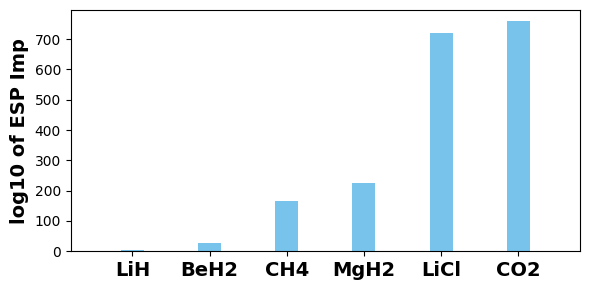

In [40]:
benchmarks = ['LiH', 'BeH2', 'CH4', 'MgH2', 'LiCl', 'CO2']#, 'Random10', 'Random15', 'Random20', 'Random25', 'Random30', 'Random35']
experiments = ['Paulihedral', 'Tetris']
Tetris_data_list = pickle_load(f'runs_final/jordan_wigner/Tetris_lookahead_data.pickle')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))

bar_width = 0.3
x = np.arange(len(benchmarks))

colors = ['#5ba585', '#30655f', '#e0e7c8']
colors1 = ['#5ba585', '#30655f', '#e0e7c8']
data = []
for i, benchmark in enumerate(benchmarks):
    bars = Tetris_data_list[i][1]['ESP_imp']
    data.append(bars)
data = np.array(data)
ax.bar(x, data, width=bar_width, label='log10 ESP improvement', color='#77C3EC')
ax.hlines(y=0, xmin=-0.5, xmax=5.5, linewidth=.5, color='black')

ax.set_xticks(x)
ax.set_xticklabels(benchmarks, fontsize=14, fontweight='bold')  # Set font size for x-axis tick labels

ax.set_ylabel('log10 of ESP Impro.', fontsize=14, fontweight='bold')
# ax.set_xticks(np.arange(len(benchmarks)) + bar_width * (len(experiments) - 1) / 2)
ax.set_xticklabels(benchmarks)
# ax.legend()
# ax.set_title('ESP improvement across Benchmarks')

plt.tight_layout()

# Save the figure as PDF
plt.savefig('ESP_Analysis.pdf')
plt.show()


Scalability

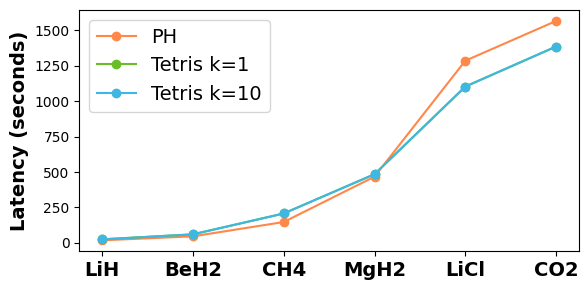

In [41]:
benchmarks = ['LiH', 'BeH2', 'CH4', 'MgH2', 'LiCl', 'CO2']#, 'Random10', 'Random15', 'Random20', 'Random25', 'Random30', 'Random35']
experiments = ['PH', 'Tetris k=1', 'Tetris k=10']

PH_data_list = pickle_load(f'runs_final/jordan_wigner/PH_data.pickle')
Tetris_lookahead_data_list = pickle_load(f'runs_final/jordan_wigner/Tetris_lookahead_data.pickle')

def get_metric_data(metric_name):
    data = []
    for i, benchmark in enumerate(benchmarks):
        bars = []
        for data_list in [PH_data_list, Tetris_data_list, Tetris_lookahead_data_list]:
            bars.append(data_list[i][1][metric_name])
        data.append(bars)
    return np.array(data)

data1 = get_metric_data('latency1')
data2 = get_metric_data('latency2')
data = data1 + data2

colors2 = ['#FF8849', '#69BE28', '#3DB7E4']
fig, ax = plt.subplots(figsize=(6, 3))
for j, experiment in enumerate(experiments):
    ax.plot(benchmarks, data[:, j], label=experiment, marker='o', color=colors2[j])

# ax.set_xlabel('Benchmarks')
ax.set_ylabel('Latency (seconds)', fontsize=14, fontweight='bold')
ax.legend(fontsize=14)
# ax.set_title('Scalability Analysis')
ax.set_xticks(ticks=x)
ax.set_xticklabels(benchmarks, fontsize=14, fontweight='bold')  # Set font size for x-axis tick labels

plt.tight_layout()

# Save the figure as PDF
plt.savefig('scalability_analysis.pdf')
plt.show()


In [42]:
# PH_data_list = pickle_load(f'runs_final/jordan_wigner/PH_data.pickle')# + pickle_load(f'runs_final/bravyi_kitaev/PH_data.pickle')
PH_data_list = pickle_load(f'runs_final/bravyi_kitaev/PH_data.pickle')
Tetris_data_list = pickle_load(f'runs_final/random/Tetris_lookahead_data.pickle')
benchmarks = ['LiH', 'BeH2', 'CH4', 'MgH2', 'LiCl', 'CO2']
# benchmarks = ['Random10', 'Random15', 'Random20', 'Random25', 'Random30', 'Random35']
def get_metric_data(metric_name):
    data = []
    for i, benchmark in enumerate(benchmarks):
        bars = []
        for data_list in [Tetris_data_list]:
            bars.append(data_list[i][1][metric_name])
        data.append(bars)
    return np.array(data)

data = get_metric_data('duration')
for i in data:
    print("{:.1f}M".format(i[0]/1000000))

8.6M
20.1M
38.4M
64.5M
97.3M
132.2M


Sycamore result

[330, 741, 2643, 2625, 2907, 4299]
[6356, 15875, 55730, 91939, 188541, 222820]


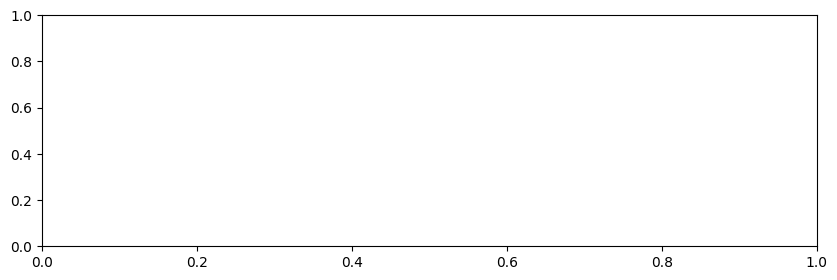

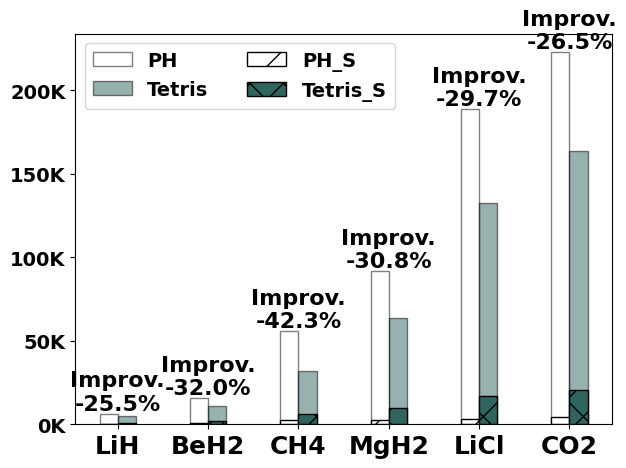

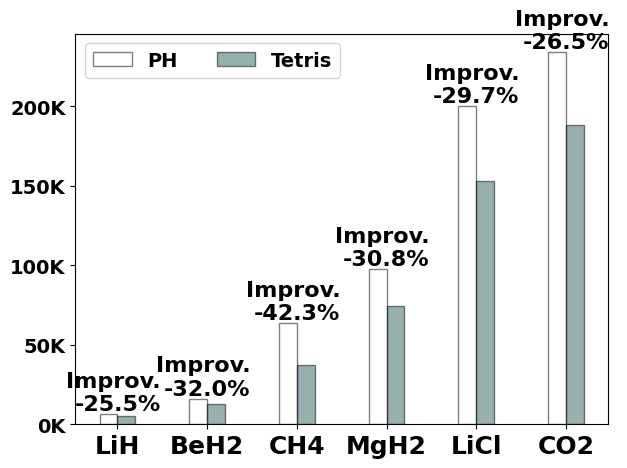

In [53]:
from matplotlib.ticker import FuncFormatter
def format_thousands(value, pos):
    return f'{value / 1000:.0f}K'

def pickle_load(filename):
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    return obj

show_imp = True

PH_data_list = pickle_load(f'runs_final/sycamore/jordan_wigner/PH_data.pickle')# + pickle_load(f'runs_final/sycamore/random/PH_data.pickle')
Tetris_data_list = pickle_load(f'runs_final/sycamore/jordan_wigner/Tetris_lookahead_data.pickle')# + pickle_load(f'runs_final/sycamore/random/Tetris_lookahead_data.pickle')
fig, ax = plt.subplots(figsize=(10, 3))

def get_metric_data(metric_name):
    data = []
    for i, benchmark in enumerate(benchmarks):
        bars = []
        for data_list in [PH_data_list, Tetris_data_list]:
            bars.append(data_list[i][1][metric_name])
        data.append(bars)
    return np.array(data)

x_values = np.array(['LiH', 'BeH2', 'CH4', 'MgH2', 'LiCl', 'CO2'])  # X-axis values
# benchmarks = x_values
ph_s = []
tetris_s = []
for i in range(6):
    ph_s.append(PH_data_list[i][1]['PH_swap_count'] * 3)
    tetris_s.append(Tetris_data_list[i][1]['tetris_swap_count'] * 3)

ph_depth = []
tetris_depth = []
for i in range(6):
    ph_depth.append(PH_data_list[i][1]['Depth'])
    tetris_depth.append(Tetris_data_list[i][1]['Depth'])

print(ph_s)

ph = []
tetris = []
for i in range(6):
    ph.append(PH_data_list[i][1]['CNOT'])
    tetris.append(Tetris_data_list[i][1]['CNOT'])

print(ph)

width = 0.2  # Width of each bar

# Create a figure and axis
fig, ax = plt.subplots()

# Set the bar positions
x_positions = np.arange(len(x_values))

# Create the bars
# Custom colors for bars (in hexadecimal format)
colors = ['#5ba585', '#30655f', '#e0e7c8']
colors1 = ['#5ba585', '#30655f', '#e0e7c8']

bar1_plot = ax.bar(x_positions - width/2, ph, width, label='PH',color='w',edgecolor='black',alpha=0.5)
bar2_plot = ax.bar(x_positions + width/2, tetris, width, label='Tetris',color=colors[1],edgecolor='black',alpha=0.5)

bar4_plot = ax.bar(x_positions - width/2, ph_s, width, label='PH_S',color='w',edgecolor='black', hatch='/')
bar5_plot = ax.bar(x_positions + width/2, tetris_s, width, label='Tetris_S',color=colors1[1],edgecolor='black',hatch='x')
if show_imp:
    for i, pos in enumerate(x_positions):
        ax.text(pos, ph[i] + 5, 'Improv.\n{:.1f}%'.format((tetris[i] - ph[i]) * 100 / ph[i]), ha='center', va='bottom', fontsize=16, weight='bold')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Set the x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(x_values, fontsize=18,fontweight='bold')  # Set font size for x-axis tick labels

# Set the y-axis label font size
# ax.set_ylabel('Values', fontsize=14,fontweight='bold')  # Set font size for y-axis label

# Set the x-axis label font size
# ax.set_xlabel('X-Axis', fontsize=14,fontweight='bold')  # Set font size for x-axis label

# Set font size for y-axis tick labels
ax.tick_params(axis='y', labelsize=14)
ytick_labels = ax.get_yticklabels()
for label in ytick_labels:
    label.set_fontweight('bold')
# Add labels and a legend
# ax.set_yscale('log')
# ax.set_ylim(0, 1)
# ax.set_xlabel('Real Molecules with BK')
# ax.set_xlabel('Real Molecules with JW')

# ax.set_ylabel('Total CNOT Gate Count')
# ax.set_ylabel('')

# ax.set_title('CX Gate Cancel Ratio',fontsize = 15)
# ax.legend(fontsize=10,ncol=2)
legend = plt.legend(fontsize=14,ncol=2)
for text in legend.get_texts():
    text.set_fontweight('bold')
# Show the plot
plt.tight_layout()
plt.savefig('exp_figs/cnot_w_breakdown_sycamore_jw.pdf')
# plt.savefig('exp_figs/cnot_w_breakdown_molecule_bk.pdf')

plt.show()



width = 0.2  # Width of each bar

# Create a figure and axis
fig, ax = plt.subplots()

# Set the bar positions
x_positions = np.arange(len(x_values))

# Create the bars
# Custom colors for bars (in hexadecimal format)
colors = ['#5ba585', '#30655f', '#e0e7c8']
colors1 = ['#5ba585', '#30655f', '#e0e7c8']

bar1_plot = ax.bar(x_positions - width/2, ph_depth, width, label='PH',color='w',edgecolor='black',alpha=0.5)
bar2_plot = ax.bar(x_positions + width/2, tetris_depth, width, label='Tetris',color=colors[1],edgecolor='black',alpha=0.5)

# bar4_plot = ax.bar(x_positions - width/2, ph_s, width, label='PH_S',color='w',edgecolor='black', hatch='/')
# bar5_plot = ax.bar(x_positions + width/2, tetris_s, width, label='Tetris_S',color=colors1[1],edgecolor='black',hatch='x')
if show_imp:
    for i, pos in enumerate(x_positions):
        ax.text(pos, ph_depth[i] + 5, 'Improv. \n{:.1f}%'.format((tetris[i] - ph[i]) * 100 / ph[i]), ha='center', va='bottom', fontsize=16, weight='bold')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Set the x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(x_values, fontsize=18,fontweight='bold')  # Set font size for x-axis tick labels

# Set the y-axis label font size
# ax.set_ylabel('Values', fontsize=14,fontweight='bold')  # Set font size for y-axis label

# Set the x-axis label font size
# ax.set_xlabel('X-Axis', fontsize=14,fontweight='bold')  # Set font size for x-axis label

# Set font size for y-axis tick labels
ax.tick_params(axis='y', labelsize=14)
ytick_labels = ax.get_yticklabels()
for label in ytick_labels:
    label.set_fontweight('bold')
# Add labels and a legend
# ax.set_yscale('log')
# ax.set_ylim(0, 1)
# ax.set_xlabel('Real Molecules with BK')
# ax.set_xlabel('Real Molecules with JW')

# ax.set_ylabel('Circuit Depth')
# ax.set_ylabel('')

# ax.set_title('CX Gate Cancel Ratio',fontsize = 15)
# ax.legend(fontsize=10,ncol=2)
legend = plt.legend(fontsize=14,ncol=2)
for text in legend.get_texts():
    text.set_fontweight('bold')
# Show the plot
plt.tight_layout()
plt.savefig('exp_figs/depth_sycamore_jw.pdf')
# plt.savefig('exp_figs/cnot_w_breakdown_molecule_bk.pdf')

plt.show()
